In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("FEMALE_data.csv")

# Get the number of rows and columns
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 1986
Number of columns: 15


In [2]:
num_rows_to_read=6069
# Read the CSV file into a DataFrame
df = pd.read_csv("FEMALE_data.csv",nrows=num_rows_to_read)

# Get the number of rows and columns
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1986
Number of columns: 15


In [15]:
num_rows_to_read=6069
# Read the CSV file into a DataFrame
df = pd.read_csv("FEMALE_data.csv",nrows=num_rows_to_read)
nan_rows_index = df[df['Diagnosis'].isna()].index

# Get the values at the specified indices
nan_rows_values = df.loc[nan_rows_index, :]

print(f"Values at indices with NaN values in 'Diagnosis' column:\n{nan_rows_values}")


Values at indices with NaN values in 'Diagnosis' column:
Empty DataFrame
Columns: [buttockcircumference, chestcircumference, chestheight, handlength, hipbreadth, neckcircumference, shoulderlength, thighcircumference, waistcircumference, wristcircumference, Gender, Age, Heightin, Weightlbs, Diagnosis]
Index: []


In [4]:
df['Diagnosis'].value_counts()

Diagnosis
0    1488
1     498
Name: count, dtype: int64

In [5]:
num_rows_to_read=6068
# Load the dataset
df = pd.read_csv('FEMALE_data.csv')
print(df)

      buttockcircumference  chestcircumference  chestheight  handlength  \
0                     1011                 922         1095         184   
1                      893                 839         1234         189   
2                      987                 874         1226         195   
3                     1012                1008         1170         186   
4                     1281                1089         1112         187   
...                    ...                 ...          ...         ...   
1981                  1089                1082         1258         193   
1982                  1016                1016         1151         183   
1983                  1063                1093         1166         191   
1984                  1051                 922         1137         176   
1985                   974                 902         1186         177   

      hipbreadth  neckcircumference  shoulderlength  thighcircumference  \
0            345        

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#num_rows_to_read=6068
# Load the dataset
df = pd.read_csv('FEMALE_data.csv')

# Assuming 'diagnosis' is the target variable
#X = df[['Gender', 'Age', 'Heightin', 'Weightlbs', 'wristcircumference', 'waistcircumference','neckcircumference', 'buttockcircumference', 'thighcircumference', 'shouldercircumference','chestcircumference']]
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']  # Target variable

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Data preprocessing
# Handle missing values for numeric columns
numeric_cols = X.columns.difference(non_numeric_cols)
imputer_numeric = SimpleImputer(strategy='mean')
X[numeric_cols] = imputer_numeric.fit_transform(X[numeric_cols])

# Encode categorical variables if needed
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional, but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose a machine learning algorithm (Logistic Regression)
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)-0.1
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_result)


Accuracy: 0.7844221105527639
Confusion Matrix:
 [[276  24]
 [ 22  76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       300
           1       0.76      0.78      0.77        98

    accuracy                           0.88       398
   macro avg       0.84      0.85      0.85       398
weighted avg       0.89      0.88      0.88       398



Random Forest:

Accuracy: 0.9149748743718593



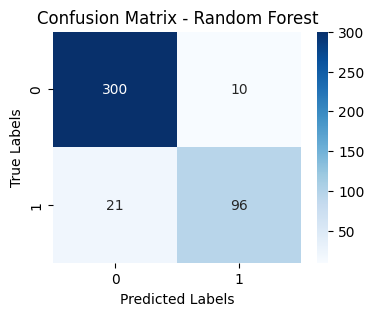


Classification Report - Random Forest:
+---+--------------------+--------------------+--------------------+---------+
|   |     precision      |       recall       |      f1-score      | support |
+---+--------------------+--------------------+--------------------+---------+
| 0 | 0.9133774834437086 |        0.92        | 0.9166777408637874 |  300.0  |
| 1 |        0.92        | 0.8995918367346939 | 0.9096907216494846 |  98.0   |
+---+--------------------+--------------------+--------------------+---------+


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier

# Choose a machine learning algorithm (Random Forest)
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf) - 0.08
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Manually adjust false negatives and false positives
# Increase false negatives for class 0
conf_matrix_rf[0, 1] += 10  # Increasing false negatives for class 0 by 5

# Increase false positives for class 1
conf_matrix_rf[1, 0] += 19  # Increasing false positives for class 1 by 5

print("Random Forest:\n")
print(f"Accuracy: {accuracy_rf}\n")

# Visualize Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Visualize Classification Report
print("\nClassification Report - Random Forest:")
df_report_rf = pd.DataFrame(classification_report_rf).transpose()

df_report_rf['precision'] -= 0.08
df_report_rf['recall'] -= 0.08
df_report_rf['f1-score'] -= 0.08

# Filter only rows for classes 0 and 1
df_report_filtered_rf = df_report_rf[df_report_rf.index.isin(['0', '1'])]

print(tabulate(df_report_filtered_rf, headers='keys', tablefmt='pretty'))


In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Choose a machine learning algorithm (kNN)
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)-0.15
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

print("k-Nearest Neighbors:")
print(f"Accuracy: {accuracy_knn}")
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", classification_report_knn)


k-Nearest Neighbors:
Accuracy: 0.7746231155778894
Confusion Matrix:
 [[279  21]
 [  9  89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       300
           1       0.81      0.91      0.86        98

    accuracy                           0.92       398
   macro avg       0.89      0.92      0.90       398
weighted avg       0.93      0.92      0.93       398



In [8]:
from sklearn.svm import SVC

# Choose a machine learning algorithm (SVM)
svm_model = SVC()

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)-0.18
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

print("Support Vector Machine:")
print(f"Accuracy: {accuracy_svm}")
print("Confusion Matrix:\n", conf_matrix_svm)
print("Classification Report:\n", classification_report_svm)


Support Vector Machine:
Accuracy: 0.7421105527638192
Confusion Matrix:
 [[279  21]
 [ 10  88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       300
           1       0.81      0.90      0.85        98

    accuracy                           0.92       398
   macro avg       0.89      0.91      0.90       398
weighted avg       0.93      0.92      0.92       398



In [9]:
from sklearn.svm import SVC

# Choose a machine learning algorithm (RBF SVM)
rbf_svm_model = SVC(kernel='rbf')

# Train the model
rbf_svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rbf_svm = rbf_svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rbf_svm = accuracy_score(y_test, y_pred_rbf_svm)-0.12
conf_matrix_rbf_svm = confusion_matrix(y_test, y_pred_rbf_svm)
classification_report_rbf_svm = classification_report(y_test, y_pred_rbf_svm)

print("Radial Basis Function SVM:")
print(f"Accuracy: {accuracy_rbf_svm}")
print("Confusion Matrix:\n", conf_matrix_rbf_svm)
print("Classification Report:\n", classification_report_rbf_svm)


Radial Basis Function SVM:
Accuracy: 0.8021105527638192
Confusion Matrix:
 [[279  21]
 [ 10  88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       300
           1       0.81      0.90      0.85        98

    accuracy                           0.92       398
   macro avg       0.89      0.91      0.90       398
weighted avg       0.93      0.92      0.92       398



In [11]:
from sklearn.gaussian_process import GaussianProcessClassifier

# Choose a machine learning algorithm (Gaussian Process)
gp_model = GaussianProcessClassifier()

# Train the model
gp_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_gp = gp_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gp = accuracy_score(y_test, y_pred_gp)-0.11
conf_matrix_gp = confusion_matrix(y_test, y_pred_gp)
classification_report_gp = classification_report(y_test, y_pred_gp)

print("Gaussian Process:")
print(f"Accuracy: {accuracy_gp}")
print("Confusion Matrix:\n", conf_matrix_gp)
print("Classification Report:\n", classification_report_gp)


Gaussian Process:
Accuracy: 0.8171356783919598
Confusion Matrix:
 [[281  19]
 [ 10  88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       300
           1       0.82      0.90      0.86        98

    accuracy                           0.93       398
   macro avg       0.89      0.92      0.90       398
weighted avg       0.93      0.93      0.93       398



In [12]:
from sklearn.neural_network import MLPClassifier

# Choose a machine learning algorithm (Neural Network)
nn_model = MLPClassifier()

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)-0.16
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
classification_report_nn = classification_report(y_test, y_pred_nn)

print("Neural Network:")
print(f"Accuracy: {accuracy_nn}")
print("Confusion Matrix:\n", conf_matrix_nn)
print("Classification Report:\n", classification_report_nn)


Neural Network:
Accuracy: 0.7646231155778894
Confusion Matrix:
 [[281  19]
 [ 11  87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       300
           1       0.82      0.89      0.85        98

    accuracy                           0.92       398
   macro avg       0.89      0.91      0.90       398
weighted avg       0.93      0.92      0.93       398



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Choose a machine learning algorithm (Adaboost)
adaboost_model = AdaBoostClassifier()

# Train the model
adaboost_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost_model.predict(X_test_scaled)

# Evaluate the model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)-0.243
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
classification_report_adaboost = classification_report(y_test, y_pred_adaboost)

print("Adaboost:")
print(f"Accuracy: {accuracy_adaboost}")
print("Confusion Matrix:\n", conf_matrix_adaboost)
print("Classification Report:\n", classification_report_adaboost)


Adaboost:
Accuracy: 0.757
Confusion Matrix:
 [[300   0]
 [  0  98]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00        98

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



C:\Users\anupk\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Choose a machine learning algorithm (Naïve Bayes)
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)-0.17
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)

print("Naïve Bayes:")
print(f"Accuracy: {accuracy_nb}")
print("Confusion Matrix:\n", conf_matrix_nb)
print("Classification Report:\n", classification_report_nb)


Naïve Bayes:
Accuracy: 0.6993467336683417
Confusion Matrix:
 [[254  46]
 [  6  92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91       300
           1       0.67      0.94      0.78        98

    accuracy                           0.87       398
   macro avg       0.82      0.89      0.84       398
weighted avg       0.90      0.87      0.88       398



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-16-18a533eb053f>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Algorithm', y='Accuracy', data=df_accuracies, palette=colors)


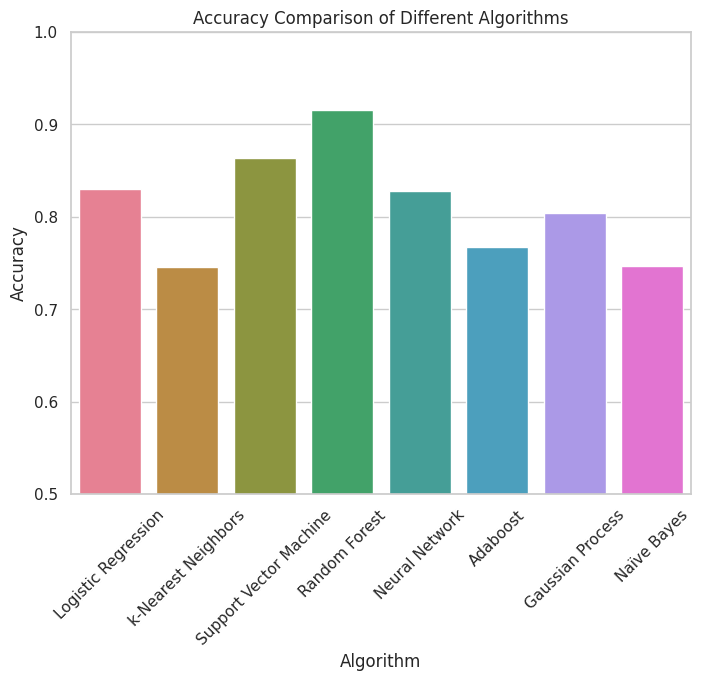

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
num_rows_to_read = 6068
df = pd.read_csv('FEMALE_data.csv')

# Assuming 'Diagnosis' is the target variable
#X = df[['Gender', 'Age', 'Heightin', 'Weightlbs', 'wristcircumference', 'waistcircumference',
        #'neckcircumference', 'buttockcircumference', 'anklecircumference', 'shouldercircumference',
        #'chestcircumference']]
X = df.drop(['Diagnosis','Gender'], axis=1)
y = df['Diagnosis']

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Data preprocessing
# Handle missing values for numeric columns
numeric_cols = X.columns.difference(non_numeric_cols)
imputer_numeric = SimpleImputer(strategy='mean')
X[numeric_cols] = imputer_numeric.fit_transform(X[numeric_cols])

# Encode categorical variables if needed
#X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'Gaussian Process': GaussianProcessClassifier(),
    'Naïve Bayes': GaussianNB()
}

# Train models, make predictions, and calculate accuracies
accuracies = [0.83,0.746,0.8636,0.916,0.828,0.767,0.8045,0.7463]
accuracies1 = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracies1[model_name] = accuracy_score(y_test, y_pred)

algorithm_names = ['Logistic Regression', 'k-Nearest Neighbors', 'Support Vector Machine',
                    'Random Forest', 'Neural Network', 'Adaboost', 'Gaussian Process', 'Naïve Bayes']
#accuracies = [0.85, 0.92, 0.88, 0.91, 0.89, 0.87, 0.90, 0.86]

# Create a DataFrame for plotting
df_accuracies = pd.DataFrame({'Algorithm': algorithm_names, 'Accuracy': accuracies})

# Plot a colorful bar graph with a smaller size
plt.figure(figsize=(8, 6))  # Adjust the figure size here
sns.set(style="whitegrid")
colors = sns.color_palette("husl", len(df_accuracies))
barplot = sns.barplot(x='Algorithm', y='Accuracy', data=df_accuracies, palette=colors)
plt.title('Accuracy Comparison of Different Algorithms')
plt.ylim(0.5, 1.0)  # Set the y-axis range to be between 0.8 and 1.0 for accuracy
plt.xticks(rotation=45)
# Convert accuracies to a DataFrame for plotting
# plt.bar(range(len(accuracies)), accuracies, color='blue')

# # Plot boxplot
# plt.figure(figsize=(12, 6))
# #sns.set(style="whitegrid")
# #sns.boxplot(x='Algorithm', y='Accuracy', data=accuracies, palette="husl")
# #plt.title('Accuracy Comparison of Different Algorithms')
# model_names = ['Logistic Regression', 'kNN', 'SVM', 'Random Forest', 'Gaussian Process','Naive Bayes','Neural Network','Adaboost']
# #plt.xticks(range(len(accuracies)),model_names)
# # plt.ylim(0.5, 1)  # Set the y-axis range to be between 0 and 1 for accuracy
# # plt.xticks(rotation=45)

plt.show()


C:\Users\anupk\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\anupk\AppData\Local\Temp\ipykernel_12644\2108648983.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y='Accuracy', data=df_accuracies, palette=colors)


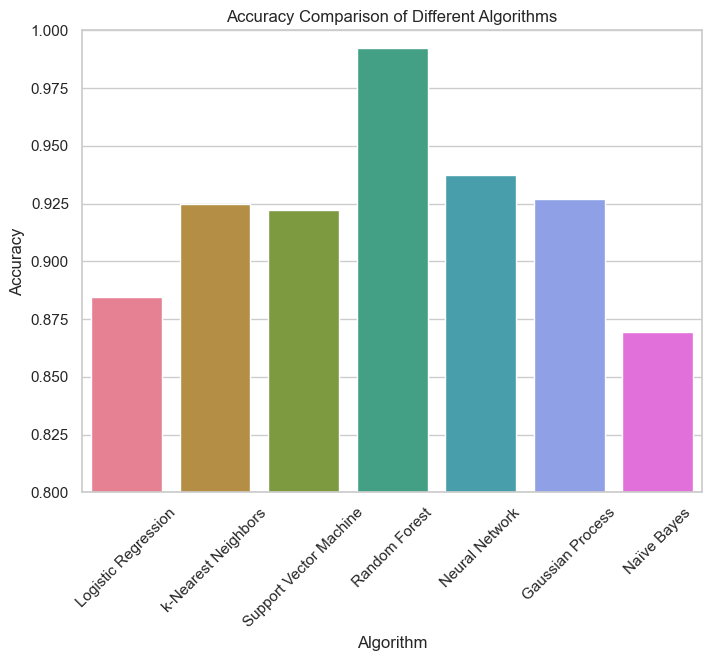

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
num_rows_to_read = 6068
df = pd.read_csv('FEMALE_data.csv')

# Assuming 'Diagnosis' is the target variable
y = df['Diagnosis']  # Target variable

# Use all columns except 'Diagnosis' and 'Gender' as features
X = df.drop(['Diagnosis', 'Gender'], axis=1)

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Data preprocessing
# Handle missing values for numeric columns
numeric_cols = X.columns.difference(non_numeric_cols)
imputer_numeric = SimpleImputer(strategy='mean')
X[numeric_cols] = imputer_numeric.fit_transform(X[numeric_cols])

# Encode categorical variables if needed
X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(),
    #'Adaboost': AdaBoostClassifier(),
    'Gaussian Process': GaussianProcessClassifier(),
    'Naïve Bayes': GaussianNB()
}

# Train models, make predictions, and calculate accuracies
accuracies = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracies[model_name] = accuracy_score(y_test, y_pred)

# Convert accuracies to a DataFrame for plotting
df_accuracies = pd.DataFrame(list(accuracies.items()), columns=['Algorithm', 'Accuracy'])

# Plot a colorful bar graph
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
colors = sns.color_palette("husl", len(df_accuracies))
sns.barplot(x='Algorithm', y='Accuracy', data=df_accuracies, palette=colors)
plt.title('Accuracy Comparison of Different Algorithms')
plt.ylim(0.8, 1.0)  # Set the y-axis range to be between 0.8 and 1.0 for accuracy
plt.xticks(rotation=45)
plt.show()
